In [34]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



In [ ]:
#mice algo.
df = pd.read_csv(r"C:\Users\JAY GAVALI\Downloads\inter_project\global-economy-indicators\Global Economy Indicators.csv")


df.columns = df.columns.str.strip()
df['Country'] = df['Country'].str.strip()


numeric_cols = [
    'Gross Domestic Product (GDP)',
    'Population',
    'Exports of goods and services',
    'Imports of goods and services',
    'Gross capital formation',
    'Final consumption expenditure',
    'Per capita GNI',
    'Manufacturing (ISIC D)',
    'Agriculture, hunting, forestry, fishing (ISIC A-B)'
]

print(f"Missing values before MICE:\n{df[numeric_cols].isnull().sum()}")


imputer = IterativeImputer(max_iter=10, random_state=0)


imputed_data = imputer.fit_transform(df[numeric_cols])


df[numeric_cols] = imputed_data

print("\nMissing values after MICE (Should be 0):\n", df[numeric_cols].isnull().sum())

# 4. CALCULATE GROWTH RATES
# Crucial: Sort by Country and Year so 1990 comes before 1991
df = df.sort_values(['Country', 'Year'])


for col in numeric_cols:
    
    short_name = col.split('(')[0].strip().replace("Gross Domestic Product", "GDP")
    new_col_name = f"{short_name}_Growth_Rate"
    
    # Apply Formula
    df[new_col_name] = df.groupby('Country')[col].pct_change() * 100

# 5. PREVIEW RESULTS
# Show Country, Year, and the new Growth Columns
growth_cols = [c for c in df.columns if 'Growth_Rate' in c]
print("\nGenerated Growth Rate Columns:")
print(df[['Country', 'Year'] + growth_cols].head())

# Save to new CSV
# df.to_csv("Global_Economy_MICE_Imputed_Growth.csv", index=False)

Missing values before MICE:
Gross Domestic Product (GDP)                            0
Population                                              0
Exports of goods and services                          21
Imports of goods and services                          42
Gross capital formation                                52
Final consumption expenditure                           0
Per capita GNI                                          0
Manufacturing (ISIC D)                                 43
Agriculture, hunting, forestry, fishing (ISIC A-B)    121
dtype: int64

Missing values after MICE (Should be 0):
 Gross Domestic Product (GDP)                          0
Population                                            0
Exports of goods and services                         0
Imports of goods and services                         0
Gross capital formation                               0
Final consumption expenditure                         0
Per capita GNI                                        0
Ma

In [119]:
df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Gross Domestic Product (GDP),GDP_Growth_Rate,Population_Growth_Rate,Exports of goods and services_Growth_Rate,Imports of goods and services_Growth_Rate,Gross capital formation_Growth_Rate,Final consumption expenditure_Growth_Rate,Per capita GNI_Growth_Rate,Manufacturing_Growth_Rate,"Agriculture, hunting, forestry, fishing_Growth_Rate"
0,4,Afghanistan,1970,0.044998,0.044998,10752971.0,Afghani,164.0,8.699174e+08,NaN,...,1.731436e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Afghanistan,1971,0.044998,0.044998,11015857.0,Afghani,168.0,9.108281e+08,NaN,...,1.812838e+09,4.701413,2.444775,16.883102,41.489351,4.651144,8.015769,2.439024,4.701560,4.702825
2,4,Afghanistan,1972,0.044998,0.044998,11286753.0,Afghani,149.0,8.279453e+08,NaN,...,1.647900e+09,-9.098297,2.459146,17.602039,5.093757,4.488777,-10.541469,-11.309524,-9.099440,-9.099715
3,4,Afghanistan,1973,0.044998,0.044998,11575305.0,Afghani,150.0,8.554869e+08,NaN,...,1.702716e+09,3.326422,2.556555,-0.325417,-9.438798,17.661130,0.614614,0.671141,3.328447,3.326498
4,4,Afghanistan,1974,0.044998,0.044998,11869879.0,Afghani,177.0,1.035913e+09,NaN,...,2.061729e+09,21.084722,2.544849,25.571366,16.244221,43.813463,17.956974,18.000000,21.084604,21.090497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8829,716,Zimbabwe,2017,1.000000,1.000000,14751101.0,US Dollar,1436.0,1.597450e+09,727963251.0,...,2.204065e+10,7.260694,2.064645,32.616264,4.156202,59.913556,-3.796731,10.546574,29.745886,-1.270101
8830,716,Zimbabwe,2018,1.000000,1.000000,15052184.0,US Dollar,1538.0,1.730686e+09,733003232.0,...,2.364527e+10,7.280232,2.041088,13.832205,0.272018,3.238622,3.819301,7.103064,4.612772,8.340539
8831,716,Zimbabwe,2019,1.000000,1.000000,15354608.0,US Dollar,1448.0,2.218615e+09,700430132.0,...,2.259452e+10,-4.443787,2.009170,-0.793459,-14.078706,-6.800590,-8.254922,-5.851756,-0.641817,28.192836
8832,716,Zimbabwe,2020,1.000000,1.000000,15669666.0,US Dollar,1352.0,1.900618e+09,671607122.0,...,2.166475e+10,-4.115044,2.051879,-8.514899,7.941659,-8.654303,1.678277,-6.629834,5.823830,-14.333154


In [120]:
print(df['Country'])
a=len(df['Country'])
   

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
8829       Zimbabwe
8830       Zimbabwe
8831       Zimbabwe
8832       Zimbabwe
8833       Zimbabwe
Name: Country, Length: 10512, dtype: object


In [121]:
# Drop the rows where Growth Rate is NaN (First year of every country)
# df = df.dropna()

# df.to_csv("Final_Model_Data.csv", index=False)

In [122]:
df.isnull().sum()

CountryID                                                                                      0
Country                                                                                        0
Year                                                                                           0
AMA exchange rate                                                                              0
IMF based exchange rate                                                                        0
Population                                                                                     0
Currency                                                                                       0
Per capita GNI                                                                                 0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                             0
Changes in inventories                                                                      1841
Construction (ISIC F)         

In [36]:
import pandas as pd

df = pd.read_csv(r"C:\Users\JAY GAVALI\Downloads\inter_project\codes\Final_Model_Data.csv")



# 2. FIX THE ERROR: Remove hidden spaces from column names
# This changes " Country " to "Country"
df.columns = df.columns.str.strip()

# 3. Now the sort will work
df = df.sort_values(['Country', 'Year'])

# 4. Calculate the Services Growth
df['Services_Trade_Growth'] = df.groupby('Country')['Wholesale, retail trade, restaurants and hotels (ISIC G-H)'].pct_change() * 100

print("Success! Services_Trade_Growth column created.")
print(df[['Country', 'Year', 'Services_Trade_Growth']].head())

Success! Services_Trade_Growth column created.
   Country  Year  Services_Trade_Growth
0  Albania  1971                    NaN
1  Albania  1972               2.889979
2  Albania  1973               3.034329
3  Albania  1974               2.493443
4  Albania  1975               3.143329


In [37]:
df


,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,GDP_Growth_Rate,Population_Growth_Rate,Exports of goods and services_Growth_Rate,Imports of goods and services_Growth_Rate,Gross capital formation_Growth_Rate,Final consumption expenditure_Growth_Rate,Per capita GNI_Growth_Rate,Manufacturing_Growth_Rate,"Agriculture, hunting, forestry, fishing_Growth_Rate",Services_Trade_Growth
0,8,Albania,1971,5.0,5.0,2389812.0,Lek,976.0,8.897590e+08,59074883.0,...,2.869371,2.799507,2.878245,2.860916,2.845194,2.876723,0.102564,2.889287,2.886885,NaN
1,8,Albania,1972,5.0,5.0,2455171.0,Lek,977.0,9.153507e+08,60818843.0,...,2.872309,2.734901,2.932948,2.882243,2.832115,2.877130,0.102459,2.859950,2.876252,2.889979
2,8,Albania,1973,5.0,5.0,2520436.0,Lek,979.0,9.411476e+08,63668482.0,...,2.878676,2.658267,2.730854,2.884171,3.031680,2.846976,0.204708,2.843646,2.818252,3.034329
3,8,Albania,1974,5.0,5.0,2585452.0,Lek,982.0,9.690638e+08,63077388.0,...,2.857130,2.579554,2.971091,2.816346,2.672071,2.906070,0.306435,2.964286,2.966189,2.493443
4,8,Albania,1975,5.0,5.0,2650122.0,Lek,986.0,9.966276e+08,66365511.0,...,2.881123,2.501303,3.097021,2.946250,2.792827,2.878353,0.407332,2.772002,2.844375,3.143329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,716,Zimbabwe,2017,1.0,1.0,14751101.0,US Dollar,1436.0,1.597450e+09,727963251.0,...,7.260694,2.064645,32.616264,4.156202,59.913556,-3.796731,10.546574,29.745886,-1.270101,7.105336
8496,716,Zimbabwe,2018,1.0,1.0,15052184.0,US Dollar,1538.0,1.730686e+09,733003232.0,...,7.280232,2.041088,13.832205,0.272018,3.238622,3.819301,7.103064,4.612772,8.340539,7.930290
8497,716,Zimbabwe,2019,1.0,1.0,15354608.0,US Dollar,1448.0,2.218615e+09,700430132.0,...,-4.443787,2.009170,-0.793459,-14.078706,-6.800590,-8.254922,-5.851756,-0.641817,28.192836,4.936553
8498,716,Zimbabwe,2020,1.0,1.0,15669666.0,US Dollar,1352.0,1.900618e+09,671607122.0,...,-4.115044,2.051879,-8.514899,7.941659,-8.654303,1.678277,-6.629834,5.823830,-14.333154,-2.314620


In [125]:
df.info

<bound method DataFrame.info of       CountryID   Country  Year  AMA exchange rate  IMF based exchange rate  \
0             8   Albania  1971                5.0                      5.0   
1             8   Albania  1972                5.0                      5.0   
2             8   Albania  1973                5.0                      5.0   
3             8   Albania  1974                5.0                      5.0   
4             8   Albania  1975                5.0                      5.0   
...         ...       ...   ...                ...                      ...   
8495        716  Zimbabwe  2017                1.0                      1.0   
8496        716  Zimbabwe  2018                1.0                      1.0   
8497        716  Zimbabwe  2019                1.0                      1.0   
8498        716  Zimbabwe  2020                1.0                      1.0   
8499        716  Zimbabwe  2021                1.0                      1.0   

      Population   

In [126]:
df.describe()

,CountryID,Year,AMA exchange rate,IMF based exchange rate,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,...,GDP_Growth_Rate,Population_Growth_Rate,Exports of goods and services_Growth_Rate,Imports of goods and services_Growth_Rate,Gross capital formation_Growth_Rate,Final consumption expenditure_Growth_Rate,Per capita GNI_Growth_Rate,Manufacturing_Growth_Rate,"Agriculture, hunting, forestry, fishing_Growth_Rate",Services_Trade_Growth
count,8500.000000,8500.000000,8.500000e+03,8.500000e+03,8.500000e+03,8500.000000,8.500000e+03,8.500000e+03,8.500000e+03,8.500000e+03,...,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8297.000000
mean,428.886235,1997.058941,3.840779e+02,3.647144e+02,3.260604e+07,9687.836824,8.990434e+09,1.651360e+09,1.207919e+10,5.702819e+10,...,7.938146,1.682762,10.501633,9.757368,10.781050,7.941742,6.230890,8.636171,6.380070,9.167625
std,249.930348,14.489247,2.391238e+03,1.972394e+03,1.250588e+08,17780.188194,4.413485e+10,9.018511e+09,5.513074e+10,1.927414e+11,...,14.306562,1.734723,31.014942,32.368239,83.200736,14.657374,14.486217,45.433509,17.986422,29.972128
min,8.000000,1971.000000,4.300000e-14,4.300000e-14,7.635000e+03,34.000000,3.094100e+04,-1.510000e+11,2.267720e+05,-1.669759e+09,...,-66.449948,-24.211396,-228.888367,-1627.384159,-2581.022941,-66.450907,-67.407407,-163.978527,-81.262409,-79.534587
25%,208.000000,1985.000000,1.000000e+00,1.000000e+00,1.359544e+06,818.750000,2.466065e+08,4.662752e+05,1.177917e+08,7.676417e+08,...,0.635618,0.614137,-1.698114,-1.729429,-4.059278,0.628579,-1.061531,-1.309702,-2.703187,-0.316648
50%,434.000000,1998.000000,3.584315e+00,3.524157e+00,6.229718e+06,2644.500000,1.233741e+09,6.959540e+07,6.132213e+08,3.956074e+09,...,7.342042,1.624993,8.363766,8.036782,7.728570,7.274334,5.742310,6.901819,5.406478,7.458617
75%,626.000000,2010.000000,7.264682e+01,6.753902e+01,2.068115e+07,10382.000000,4.944776e+09,7.077288e+08,4.370377e+09,2.409179e+10,...,15.211701,2.636620,19.360024,19.211050,20.718938,14.980816,13.338928,16.283009,14.461412,16.562149
max,894.000000,2021.000000,1.116366e+05,4.200000e+04,1.425893e+09,234317.000000,1.350000e+12,2.110000e+11,1.240000e+12,3.530000e+12,...,203.817723,35.849057,1145.416541,1144.349652,6366.050571,266.976801,243.243243,3645.917880,510.359673,1960.369516


In [127]:
# df.to_csv("last2_final_file_it_get_complite_2_feb.csv", index=False)

In [38]:
import openpyxl
path=r"C:\Users\JAY GAVALI\Downloads\inter_project\trial_2.0.xlsx"
df=pd.read_excel(path,engine='openpyxl')
df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,GDP_Growth_Rate,Population_Growth_Rate,Exports of goods and services_Growth_Rate,Imports of goods and services_Growth_Rate,Gross capital formation_Growth_Rate,Final consumption expenditure_Growth_Rate,Per capita GNI_Growth_Rate,Manufacturing_Growth_Rate,"Agriculture, hunting, forestry, fishing_Growth_Rate",Services_Trade_Growth
0,8,Albania,1971,5.000000,5.000000,2389812,Lek,976,8.897590e+08,59074883,...,2.872309,2.734901,2.932948,2.882243,2.832115,2.877130,0.102459,2.859950,2.876252,2.889979
1,8,Albania,1972,5.000000,5.000000,2455171,Lek,977,9.153507e+08,60818843,...,2.872309,2.734901,2.932948,2.882243,2.832115,2.877130,0.102459,2.859950,2.876252,2.889979
2,8,Albania,1973,5.000000,5.000000,2520436,Lek,979,9.411476e+08,63668482,...,2.878676,2.658267,2.730854,2.884171,3.031680,2.846976,0.204708,2.843646,2.818252,3.034329
3,8,Albania,1974,5.000000,5.000000,2585452,Lek,982,9.690638e+08,63077388,...,2.857130,2.579554,2.971091,2.816346,2.672071,2.906070,0.306435,2.964286,2.966189,2.493443
4,8,Albania,1975,5.000000,5.000000,2650122,Lek,986,9.966276e+08,66365511,...,2.881123,2.501303,3.097021,2.946250,2.792827,2.878353,0.407332,2.772002,2.844375,3.143329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313,...,20.582767,3.162575,22.293491,16.930973,32.490511,11.046545,19.570603,30.537992,-20.235805,12.776893
8496,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411,...,1.715712,3.109246,10.332992,2.655572,-4.143755,-3.352992,0.207182,-14.297457,-15.551231,12.531595
8497,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395,...,-11.407815,3.053304,-19.161750,-18.069419,-9.986850,-7.944434,-14.128187,-12.171224,-24.146703,-17.217344
8498,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787,...,-22.306490,2.977279,4.959373,-25.988618,-36.094938,-31.041803,-25.521669,-11.701946,-19.145437,-34.786417


In [39]:
df.isnull().sum()

CountryID                                                                                     0
Country                                                                                       0
Year                                                                                          0
AMA exchange rate                                                                           187
IMF based exchange rate                                                                     184
Population                                                                                    0
Currency                                                                                      0
Per capita GNI                                                                                0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                            0
Changes in inventories                                                                        0
Construction (ISIC F)                   

In [40]:
df = df.sort_values(by=['Country', 'Year'])

# 2. Calculate Percentage Change
# We group by 'Country' so the calculation resets for each nation
df['Government_Expenditure_Growth_Rate'] = df.groupby('Country')['General government final consumption expenditure'].pct_change() * 100

# View the result
print(df[['Country', 'Year', 'General government final consumption expenditure', 'Government_Expenditure_Growth_Rate']].head())
df.isnull().sum()

   Country  Year  General government final consumption expenditure  \
0  Albania  1971                                         211681441   
1  Albania  1972                                         217744245   
2  Albania  1973                                         223896669   
3  Albania  1974                                         230586803   
4  Albania  1975                                         236994563   

   Government_Expenditure_Growth_Rate  
0                                 NaN  
1                            2.864117  
2                            2.825528  
3                            2.988045  
4                            2.778893  


CountryID                                                                                     0
Country                                                                                       0
Year                                                                                          0
AMA exchange rate                                                                           187
IMF based exchange rate                                                                     184
Population                                                                                    0
Currency                                                                                      0
Per capita GNI                                                                                0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                            0
Changes in inventories                                                                        0
Construction (ISIC F)                   

In [5]:
# df.to_excel("final refinement.xlsx", index=False, engine='openpyxl')

In [41]:
x=pd.concat([df['Country'],df['Year'], df['Population_Growth_Rate'],df['Exports of goods and services_Growth_Rate'],df['Imports of goods and services_Growth_Rate'],df['Gross capital formation_Growth_Rate'],df['Final consumption expenditure_Growth_Rate'],df['Government_Expenditure_Growth_Rate'],df['GDP_Growth_Rate']], axis=1)

In [42]:
x

,Country,Year,Population_Growth_Rate,Exports of goods and services_Growth_Rate,Imports of goods and services_Growth_Rate,Gross capital formation_Growth_Rate,Final consumption expenditure_Growth_Rate,Government_Expenditure_Growth_Rate,GDP_Growth_Rate
0,Albania,1971,2.734901,2.932948,2.882243,2.832115,2.877130,NaN,2.872309
1,Albania,1972,2.734901,2.932948,2.882243,2.832115,2.877130,2.864117,2.872309
2,Albania,1973,2.658267,2.730854,2.884171,3.031680,2.846976,2.825528,2.878676
3,Albania,1974,2.579554,2.971091,2.816346,2.672071,2.906070,2.988045,2.857130
4,Albania,1975,2.501303,3.097021,2.946250,2.792827,2.878353,2.778893,2.881123
...,...,...,...,...,...,...,...,...,...
7186,Zimbabwe,2017,2.064645,32.616264,4.156202,59.913556,-3.796731,-31.044731,7.260694
7187,Zimbabwe,2018,2.041088,13.832205,0.272018,3.238622,3.819301,-4.478889,7.280232
7188,Zimbabwe,2019,2.009170,-0.793459,-14.078706,-6.800590,-8.254922,-32.400066,-4.443787
7189,Zimbabwe,2020,2.051879,-8.514899,7.941659,-8.654303,1.678277,15.857091,-4.115044


In [43]:
x['Government_Expenditure_Growth_Rate'] = x.groupby('Country')['Government_Expenditure_Growth_Rate'].bfill()

In [44]:
x.isnull().sum()

Country                                      0
Year                                         0
Population_Growth_Rate                       0
Exports of goods and services_Growth_Rate    0
Imports of goods and services_Growth_Rate    0
Gross capital formation_Growth_Rate          0
Final consumption expenditure_Growth_Rate    0
Government_Expenditure_Growth_Rate           0
GDP_Growth_Rate                              0
dtype: int64

In [45]:
x

,Country,Year,Population_Growth_Rate,Exports of goods and services_Growth_Rate,Imports of goods and services_Growth_Rate,Gross capital formation_Growth_Rate,Final consumption expenditure_Growth_Rate,Government_Expenditure_Growth_Rate,GDP_Growth_Rate
0,Albania,1971,2.734901,2.932948,2.882243,2.832115,2.877130,2.864117,2.872309
1,Albania,1972,2.734901,2.932948,2.882243,2.832115,2.877130,2.864117,2.872309
2,Albania,1973,2.658267,2.730854,2.884171,3.031680,2.846976,2.825528,2.878676
3,Albania,1974,2.579554,2.971091,2.816346,2.672071,2.906070,2.988045,2.857130
4,Albania,1975,2.501303,3.097021,2.946250,2.792827,2.878353,2.778893,2.881123
...,...,...,...,...,...,...,...,...,...
7186,Zimbabwe,2017,2.064645,32.616264,4.156202,59.913556,-3.796731,-31.044731,7.260694
7187,Zimbabwe,2018,2.041088,13.832205,0.272018,3.238622,3.819301,-4.478889,7.280232
7188,Zimbabwe,2019,2.009170,-0.793459,-14.078706,-6.800590,-8.254922,-32.400066,-4.443787
7189,Zimbabwe,2020,2.051879,-8.514899,7.941659,-8.654303,1.678277,15.857091,-4.115044


x.isnull().sum()

In [11]:
# x.to_csv("ready_to_create_model.csv" ,index=False)

In [12]:
x.isnull().sum()

Country                                      0
Year                                         0
Population_Growth_Rate                       0
Exports of goods and services_Growth_Rate    0
Imports of goods and services_Growth_Rate    0
Gross capital formation_Growth_Rate          0
Final consumption expenditure_Growth_Rate    0
Government_Expenditure_Growth_Rate           0
GDP_Growth_Rate                              0
dtype: int64

In [46]:
x['Government_Expenditure_Growth_Rate'] = x.groupby('Country')['Government_Expenditure_Growth_Rate'].bfill()

In [47]:
x.isnull().sum()

Country                                      0
Year                                         0
Population_Growth_Rate                       0
Exports of goods and services_Growth_Rate    0
Imports of goods and services_Growth_Rate    0
Gross capital formation_Growth_Rate          0
Final consumption expenditure_Growth_Rate    0
Government_Expenditure_Growth_Rate           0
GDP_Growth_Rate                              0
dtype: int64

In [30]:
x.to_csv("NEw_do_machine_learning_using_this.csv",index=False)

In [31]:
x.to_csv("_include_all_data_of_gdp.csv", index=False)

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# 1. Load Data
df = pd.read_csv('now_do_machine_learning_using_this.csv')

# 2. CLEANING STEP (Crucial!)
# Remove duplicate rows
df = df.drop_duplicates()

# Remove extreme outliers (e.g., remove growth > 100% or < -100%)
# These are likely data errors or hyperinflation years that confuse the model
df_clean = df[(df['GDP_Growth_Rate'] < 100) & (df['GDP_Growth_Rate'] > -100)].copy()

# 3. Prepare Features
le = LabelEncoder()
df_clean['Country_Encoded'] = le.fit_transform(df_clean['Country'])

features = ['Country_Encoded', 'Population_Growth_Rate', 
            'Exports of goods and services_Growth_Rate', 
            'Imports of goods and services_Growth_Rate',
            'Gross capital formation_Growth_Rate', 
            'Final consumption expenditure_Growth_Rate', 
            'Government_Expenditure_Growth_Rate']

X = df_clean[features]
y = df_clean['GDP_Growth_Rate']

# 4. Train Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 5. Check New Accuracy
accuracy = rf.score(X_test, y_test)
print(f"New Model Accuracy: {accuracy * 100:.2f}%")

New Model Accuracy: 87.01%


In [18]:
df.isnull().sum()

CountryID                                                                                     0
Country                                                                                       0
Year                                                                                          0
AMA exchange rate                                                                           187
IMF based exchange rate                                                                     184
Population                                                                                    0
Currency                                                                                      0
Per capita GNI                                                                                0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                            0
Changes in inventories                                                                        0
Construction (ISIC F)                   

In [19]:
# df.to_csv("fully_refine_data_ready_for_train_model.csv")

In [33]:
 #1. Load the data
df = pd.read_csv(r"C:\Users\JAY GAVALI\Downloads\inter_project\codes\fully_refine_data_ready_for_train_model.csv")

# 2. Handle Missing Values (Backfill Strategy)
# This fills the missing 203 rows with the next year's data for that country
df['Government_Expenditure_Growth_Rate'] = df.groupby('Country')['Government_Expenditure_Growth_Rate'].bfill()
# Fallback: If any NaNs remain (e.g. a country with no data at all), fill with 0
df['Government_Expenditure_Growth_Rate'] = df['Government_Expenditure_Growth_Rate'].fillna(0)
df.to_csv("")


FileNotFoundError: [Errno 2] No such file or directory: ''

In [26]:
df = pd.read_csv(r"C:\Users\JAY GAVALI\Downloads\inter_project\codes\fully_refine_data_ready_for_train_model.csv")
df

,Unnamed: 0,Country,Population_Growth_Rate,Exports of goods and services_Growth_Rate,Imports of goods and services_Growth_Rate,Gross capital formation_Growth_Rate,Final consumption expenditure_Growth_Rate,Government_Expenditure_Growth_Rate,GDP_Growth_Rate
0,0,Albania,2.734901,2.932948,2.882243,2.832115,2.877130,2.864117,2.872309
1,2,Albania,2.658267,2.730854,2.884171,3.031680,2.846976,2.825528,2.878676
2,3,Albania,2.579554,2.971091,2.816346,2.672071,2.906070,2.988045,2.857130
3,4,Albania,2.501303,3.097021,2.946250,2.792827,2.878353,2.778893,2.881123
4,5,Albania,2.393777,2.125896,2.889961,3.631432,2.756511,2.709687,2.897782
...,...,...,...,...,...,...,...,...,...
8292,8495,Zimbabwe,2.064645,32.616264,4.156202,59.913556,-3.796731,-31.044731,7.260694
8293,8496,Zimbabwe,2.041088,13.832205,0.272018,3.238622,3.819301,-4.478889,7.280232
8294,8497,Zimbabwe,2.009170,-0.793459,-14.078706,-6.800590,-8.254922,-32.400066,-4.443787
8295,8498,Zimbabwe,2.051879,-8.514899,7.941659,-8.654303,1.678277,15.857091,-4.115044


In [42]:
df.to_csv("complited_data_cleaning.csv",index=False)

In [27]:
df=df.drop(columns=['Unnamed: 0'])

In [52]:
df.isnull().sum()

Country                                      0
Population_Growth_Rate                       0
Exports of goods and services_Growth_Rate    0
Imports of goods and services_Growth_Rate    0
Gross capital formation_Growth_Rate          0
Final consumption expenditure_Growth_Rate    0
Government_Expenditure_Growth_Rate           0
GDP_Growth_Rate                              0
dtype: int64

In [53]:
import pandas as pd

# 1. Load your dataset
df = pd.read_csv('complited_data_cleaning.csv')

# 2. Select the numerical columns (excluding 'Country')
cols_to_fix = [
    'Exports of goods and services_Growth_Rate',
    'Imports of goods and services_Growth_Rate',
    'Gross capital formation_Growth_Rate',
    'Final consumption expenditure_Growth_Rate',
    'Government_Expenditure_Growth_Rate',
    'Population_Growth_Rate',
    'GDP_Growth_Rate'
]

# 3. Apply "Clipping" to fix outliers without deleting rows
# - Values < -100 become -100
# - Values > 100 become 100
df[cols_to_fix] = df[cols_to_fix].clip(lower=-100, upper=100)

# 4. Save the corrected file
df.to_csv('fully_corrected_data.csv', index=False)

# Optional: Verify the fix
print("Min values after fix:\n", df[cols_to_fix].min())
print("Max values after fix:\n", df[cols_to_fix].max())

Min values after fix:
 Exports of goods and services_Growth_Rate   -100.000000
Imports of goods and services_Growth_Rate   -100.000000
Gross capital formation_Growth_Rate         -100.000000
Final consumption expenditure_Growth_Rate    -66.450907
Government_Expenditure_Growth_Rate           -84.648792
Population_Growth_Rate                       -24.211396
GDP_Growth_Rate                              -66.449948
dtype: float64
Max values after fix:
 Exports of goods and services_Growth_Rate    100.0
Imports of goods and services_Growth_Rate    100.0
Gross capital formation_Growth_Rate          100.0
Final consumption expenditure_Growth_Rate    100.0
Government_Expenditure_Growth_Rate           100.0
Population_Growth_Rate                       100.0
GDP_Growth_Rate                              100.0
dtype: float64


In [54]:
df

,Country,Population_Growth_Rate,Exports of goods and services_Growth_Rate,Imports of goods and services_Growth_Rate,Gross capital formation_Growth_Rate,Final consumption expenditure_Growth_Rate,Government_Expenditure_Growth_Rate,GDP_Growth_Rate
0,Albania,2.734901,2.932948,2.882243,2.832115,2.877130,2.864117,2.872309
1,Albania,2.658267,2.730854,2.884171,3.031680,2.846976,2.825528,2.878676
2,Albania,2.579554,2.971091,2.816346,2.672071,2.906070,2.988045,2.857130
3,Albania,2.501303,3.097021,2.946250,2.792827,2.878353,2.778893,2.881123
4,Albania,2.393777,2.125896,2.889961,3.631432,2.756511,2.709687,2.897782
...,...,...,...,...,...,...,...,...
8292,Zimbabwe,2.064645,32.616264,4.156202,59.913556,-3.796731,-31.044731,7.260694
8293,Zimbabwe,2.041088,13.832205,0.272018,3.238622,3.819301,-4.478889,7.280232
8294,Zimbabwe,2.009170,-0.793459,-14.078706,-6.800590,-8.254922,-32.400066,-4.443787
8295,Zimbabwe,2.051879,-8.514899,7.941659,-8.654303,1.678277,15.857091,-4.115044


✅ Saved graph_heatmap.png


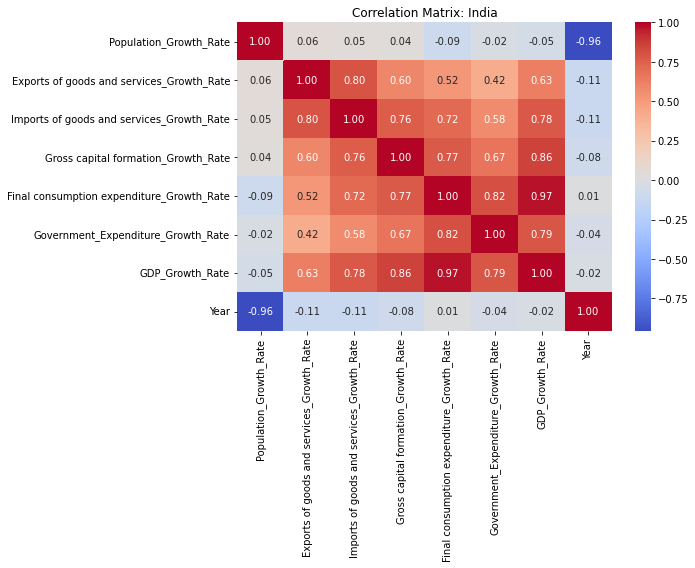

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('fully_corrected_data.csv') # Make sure this file is in the folder
country = "India"
data = df[df['Country'] == country].copy()
data['Year'] = range(1973, 1973 + len(data))
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Matrix: {country}')
plt.tight_layout()
print("✅ Saved graph_heatmap.png")

✅ Saved graph_line_chart.png


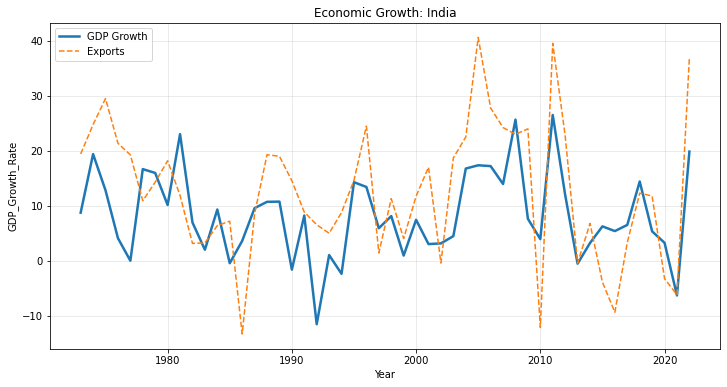

In [60]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='GDP_Growth_Rate', label='GDP Growth', linewidth=2.5)
sns.lineplot(data=data, x='Year', y='Exports of goods and services_Growth_Rate', label='Exports', linestyle='--')
plt.title(f'Economic Growth: {country}')
plt.grid(True, alpha=0.3)
#plt.savefig('graph_line_chart.png') # <--- Saves the image file
print("✅ Saved graph_line_chart.png")

In [61]:
df

,Country,Population_Growth_Rate,Exports of goods and services_Growth_Rate,Imports of goods and services_Growth_Rate,Gross capital formation_Growth_Rate,Final consumption expenditure_Growth_Rate,Government_Expenditure_Growth_Rate,GDP_Growth_Rate
0,Albania,2.734901,2.932948,2.882243,2.832115,2.877130,2.864117,2.872309
1,Albania,2.658267,2.730854,2.884171,3.031680,2.846976,2.825528,2.878676
2,Albania,2.579554,2.971091,2.816346,2.672071,2.906070,2.988045,2.857130
3,Albania,2.501303,3.097021,2.946250,2.792827,2.878353,2.778893,2.881123
4,Albania,2.393777,2.125896,2.889961,3.631432,2.756511,2.709687,2.897782
...,...,...,...,...,...,...,...,...
8292,Zimbabwe,2.064645,32.616264,4.156202,59.913556,-3.796731,-31.044731,7.260694
8293,Zimbabwe,2.041088,13.832205,0.272018,3.238622,3.819301,-4.478889,7.280232
8294,Zimbabwe,2.009170,-0.793459,-14.078706,-6.800590,-8.254922,-32.400066,-4.443787
8295,Zimbabwe,2.051879,-8.514899,7.941659,-8.654303,1.678277,15.857091,-4.115044
